In [25]:
import cv2
import os
import numpy as np
import random

### Get the fences and image filepaths in two lists

In [2]:
fences = [f'Fences/{file}' for file in os.listdir('Fences/') if file != '.DS_Store']
images = [f'Images/{file}' for file in os.listdir('Images/') if file != '.DS_Store']

sample_image = cv2.imread(images[0], cv2.IMREAD_UNCHANGED)
image_height = sample_image.shape[0]
image_width = sample_image.shape[1]

### Helper Functions
These functions retrieve a random fence from the list of fences and view a fence as a preview

In [3]:
def Get_Random_Image():
    img = random.choice(images)
    img = cv2.imread(img, cv2.IMREAD_UNCHANGED)
    return cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)

def Get_Random_Fence():
    fence = random.choice(fences)
    fence = 'Fences/fence-29.png'
    return cv2.imread(fence, cv2.IMREAD_UNCHANGED)

# Press esc twice to close the img
def View_Image(img):
    cv2.startWindowThread()
    cv2.imshow("Fence", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey()

In [7]:
def Get_Random_Crop(fence):
    max_y = fence.shape[0] - image_height
    max_x = fence.shape[1] - image_width
    y = np.random.randint(0, max_y)
    x = np.random.randint(0, max_x)
    return fence[y: y + image_height, x: x + image_width, :]

def RandomFlip(img):
    if bool(random.getrandbits(1)):
        return cv2.flip(img, 1)
    else:
        return img

def ColorJitter(img):
    jitter = transforms.ColorJitter(brightness=0.5, hue=0.2)
    return jitter(img)
    
def Overlay_Fence(img, fence):
    # normalize alpha channels from 0-255 to 0-1
    alpha_background = img[:,:,3] / 255.0
    alpha_foreground = fence[:,:,3] / 255.0

    for color in range(0, 3):
        img[:,:,color] = alpha_foreground * fence[:,:,color] + alpha_background * img[:,:,color] * (1 - alpha_foreground)

    img[:,:,3] = (1 - (1 - alpha_foreground) * (1 - alpha_background)) * 255
    return img

def Augment_Image(img, fence):
    cropped_fence = Get_Random_Crop(fence)
    cropped_fence = RandomFlip(cropped_fence)
    img = RandomFlip(img)
    img = Overlay_Fence(img, cropped_fence)
    img = ColorJitter(img)
    return img


Test these methods to get a fence and crop it

In [26]:
fence = Get_Random_Fence()
img = Get_Random_Image()

libpng warning: iCCP: known incorrect sRGB profile


In [9]:
img = Augment_Image(img, fence)
View_Image(img)

/Users/ethanruoff/opt/anaconda3/envs/cv/lib/python3.9/site-packages/opencv_transforms/transforms.py:708: UserWarning: Hue jitter enabled. Will slow down loading immensely.
  warnings.warn(


## Dataloader

In [5]:
import os
import matplotlib.pyplot as plt
from torchvision import transforms
import random
import dataloader as defencer
from torchsummary import summary

Image train=67581, Fence train=18
Image val=8448, Fence val=9
Image test=8448, Fence test=3


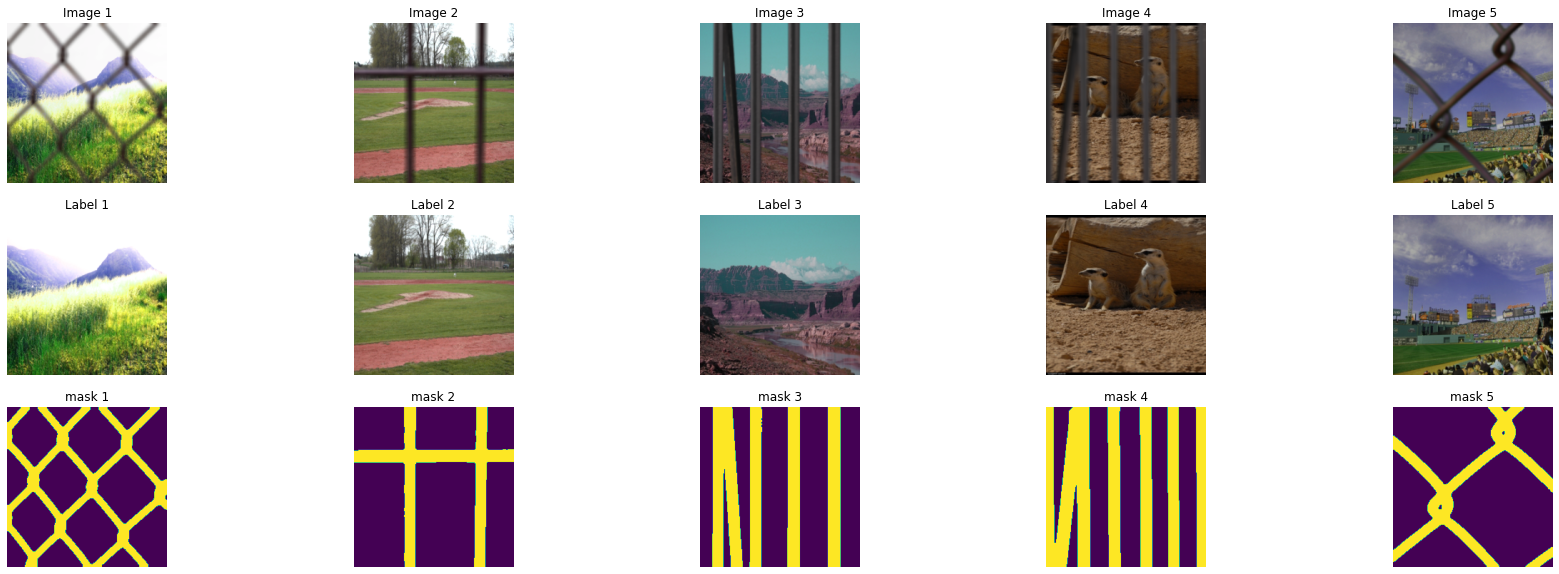

In [6]:
loader_train, loader_val, loader_test = defencer.Get_DataLoaders(8, 10)

In [ ]:
import Model.defence_resnet50 as model_gen

In [3]:
model = model_gen.Get_Model()
summary(model, (3, 224, 224))

[W NNPACK.cpp:80] Could not initialize NNPACK! Reason: Unsupported hardware.


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
     PartialConv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
     PartialConv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
     PartialConv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
    PartialConv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
    PartialConv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,